In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import k3d
from k3d.colormaps import matplotlib_color_maps

In [18]:
a=1.0
b=1.0
c=1.0
V0=2.0
V1=-1.0

dx=1.0/50
dy=dx
dz=dx

nx=int(a/dx)
ny=int(b/dy)
nz=int(c/dz)

x0=np.linspace(0.0,a,nx+1)
y0=np.linspace(0.0,b,ny+1)
z0=np.linspace(0.0,c,nz+1)

x,y,z=np.meshgrid(x0,y0,z0)
print(x.shape)

x=np.transpose(x,(2,0,1))
y=np.transpose(y,(2,0,1))
z=np.transpose(z,(2,0,1))
print(x.shape)

# Initial guess for the solution
V=np.zeros_like(x)

# Apply boundary conditions
V[:,:,0]=V0*(y[:,:,0]/b)* (1-(y[:,:,0]/b))*(z[:,:,0]/c)*(1-(z[:,:,0]/c)) # x=0, y, z 
V[:,:,-1]=V1 # x=a, y, z
V[:,0,:]=0 # x, y=0, z 
V[:,-1,:]=0 # x, y=b, z 
V[0,:,:]=0 # x, y, z=0
V[-1,:,:]=0 # x, y, z=c

eps=1.0e-6

V1=np.copy(V)
V1[1:-1,1:-1,1:-1]=1.0/6.0*(V[0:-2,1:-1,1:-1]+V[2:,1:-1,1:-1]+V[1:-1,0:-2,1:-1]+V[1:-1,2:,1:-1]+V[1:-1,1:-1,0:-2]+V[1:-1,1:-1,2:])
resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
resid0=resid
V=np.copy(V1)

start=time.time()
it=0
while (resid/resid0>eps):
    V1[1:-1,1:-1,1:-1]=1.0/6.0*(V[0:-2,1:-1,1:-1]+V[2:,1:-1,1:-1]+V[1:-1,0:-2,1:-1]+V[1:-1,2:,1:-1]+V[1:-1,1:-1,0:-2]+V[1:-1,1:-1,2:])
    resid=np.sum(np.fabs(V1-V))
    V=np.copy(V1)
    it=it+1
end=time.time()
print("Number of iterations:",it)
print("The time spent is",end-start,"s")

(51, 51, 51)
(51, 51, 51)
Number of iterations: 5451
The time spent is 7.865487098693848 s


0.5


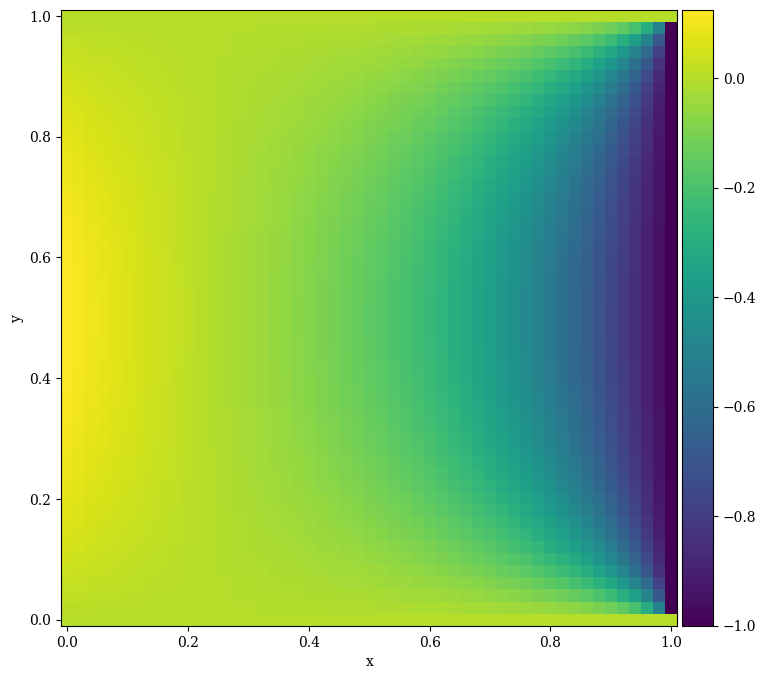

In [19]:
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(x0,y0,V[nz//2,:,:])
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig("problem3_xy.png")
print(z0[nz//2])
plt.show()

0.5


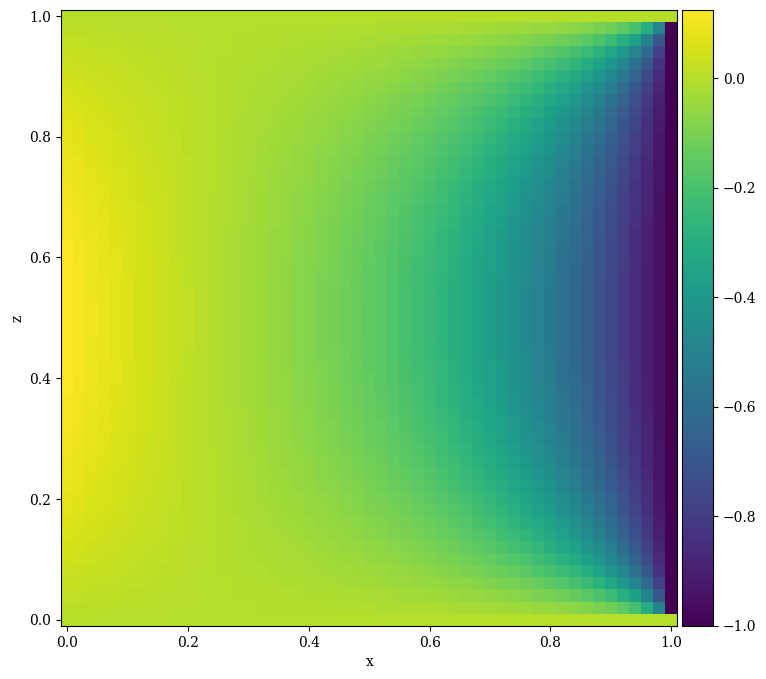

In [20]:
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(x0,z0,V[:,ny//2,:])
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig("problem3_xz.png")
print(y0[ny//2])
plt.show()

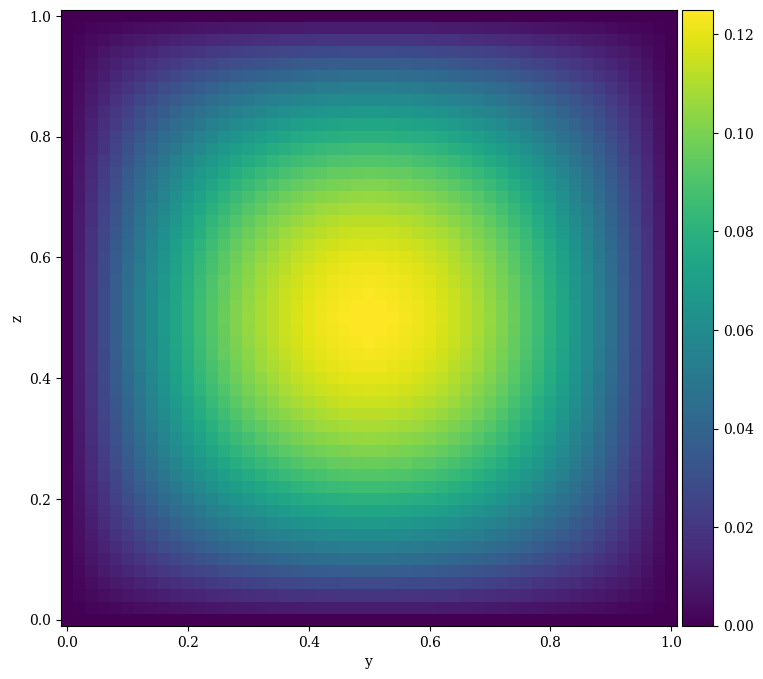

In [21]:
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(y0,z0,V[:,:,0])
ax.set_aspect('equal')
plt.xlabel("y")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig("problem3_yz_0.png")
plt.show()

x= 0.5


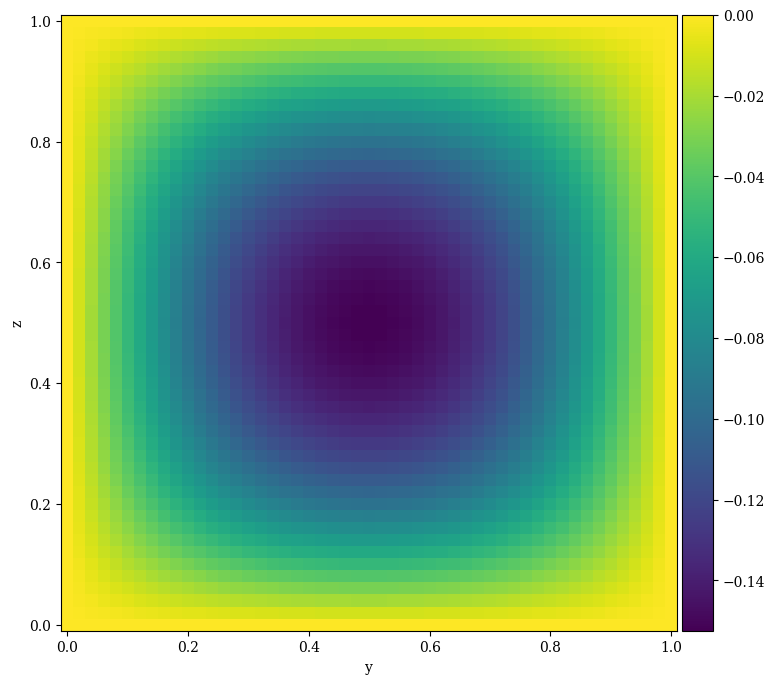

In [22]:
print('x=',x0[nx//2])
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(111)
im=plt.pcolormesh(y0,z0,V[:,:,nx//2])
ax.set_aspect('equal')
plt.xlabel("y")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.savefig("problem3_yz_024.png")
plt.show()

In [38]:
import k3d
plt_marching1 = k3d.marching_cubes(V, level=0.0,
                                  color=0x008000, # green
                                  opacity=0.25,
                                  xmin=np.amin(x0), xmax=np.amax(x0),
                                  ymin=np.amin(y0), ymax=np.amax(y0),
                                  zmin=np.amin(z0), zmax=np.amax(z0),
                                  compression_level=9,
                                  flat_shading=False)
plt_marching2 = k3d.marching_cubes(V, level=0.05,
                                  color=0xFFFF00, # yellow
                                  opacity=0.25,
                                  xmin=np.amin(x0), xmax=np.amax(x0),
                                  ymin=np.amin(y0), ymax=np.amax(y0),
                                  zmin=np.amin(z0), zmax=np.amax(z0),
                                  compression_level=9,
                                  flat_shading=False)
plt_marching3 = k3d.marching_cubes(V, level=-0.5,
                                  color=0x0000FF, # blue
                                  opacity=0.25,
                                  xmin=np.amin(x0), xmax=np.amax(x0),
                                  ymin=np.amin(y0), ymax=np.amax(y0),
                                  zmin=np.amin(z0), zmax=np.amax(z0),
                                  compression_level=9,
                                  flat_shading=False)


plot = k3d.plot()
plot += plt_marching1
plot += plt_marching2
plot += plt_marching3
plot.display()

Output()